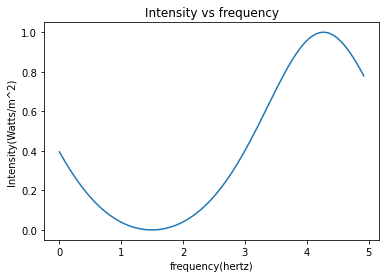

C:\Users\Rosalyn\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[[inf inf]
 [inf inf]]
[inf inf]

 fit 1 is: inf 
 fit 2 is: inf

 sigma 1 is:  inf 
 sigma 2 is:  inf


Text(0.5, 1.0, 'Photodiode signal vs time (amplitude 8)')

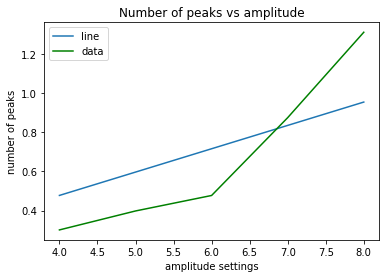

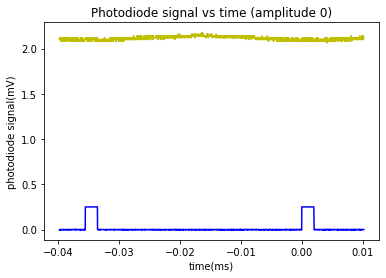

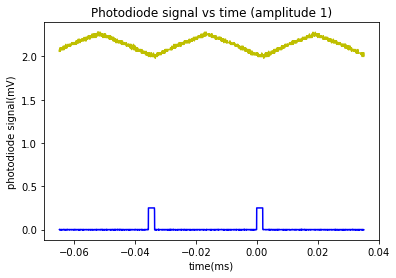

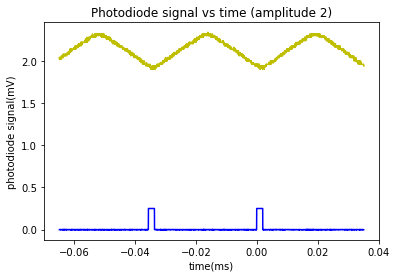

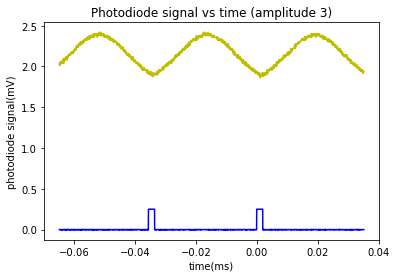

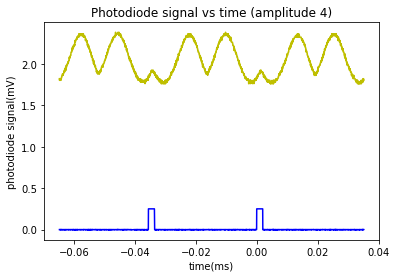

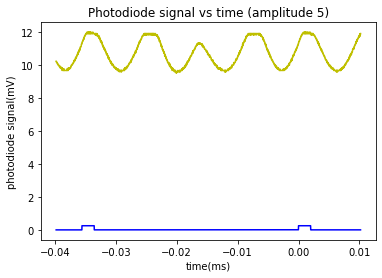

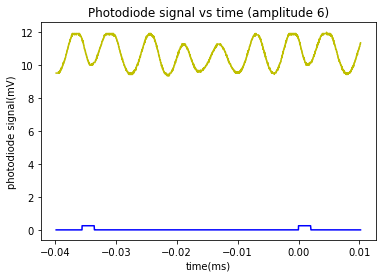

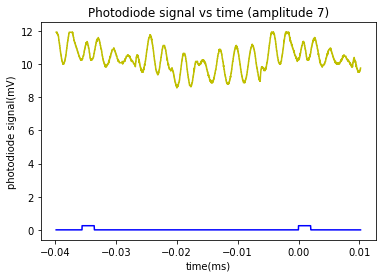

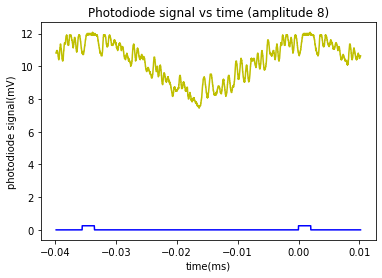

In [1]:
# section 4.4.1
#1. import the useful packages. 
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cnst
from scipy.optimize import curve_fit

#2. User defined parameters
R = 0.09 #power reflected from mirrors
D = 27.0 #separation distance in mm
lo= 780     #nm  starting wavelength of 780nm for analysis
dl= 0.00001       #nm  
steps = 1000    # the number of wavelengths to consider
nreflect = 100  #number of reflections in etalon
#pi=3.14159265359 


#3. Compute r and t parameters from R
T=1-R
r=np.sqrt(R)
t=np.sqrt(T)

#4. Prepare array for results.
result = [0.0]*steps
freq = [0.0]*steps

for i in range(steps):
    Esum=0.0
    for j in range(nreflect):
        Esum = Esum + (t**2)*r**(2*j)*np.cos( (1 + 2*j)*D*1e-3 / ((lo + i*dl)*1e-9)*(2*cnst.pi) + cnst.pi)
        result[i]=Esum**2
        freq[i]= (cnst.c/(lo*1e-9)-cnst.c/ ((lo + i*dl)*1e-9) )/1e9

plt.plot(freq,result)
plt.xlabel('frequency(hertz)')
plt.ylabel('Intensity(Watts/m^2)')
plt.title('Intensity vs frequency')
plt.show()

# curve fitting
amplitude=[]
log_peak=[]
with open("extrapolate.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        amplitude.append(float(row[0]))
        log_peak.append(float(row[2]))
        
amplitude_trim = amplitude
log_peak_trim = log_peak

#Curve fitting 
# from numpy import log 
def line(x,m,b):
    return np.array(m)*x+0

popt, pcov = curve_fit(line, amplitude_trim, log_peak_trim, p0 = [1, 0])
perr= np.sqrt(np.diag(pcov))

plot1=plt.figure(1)
plt.plot(amplitude_trim, line(amplitude_trim, *popt), label='fit')
plt.plot(amplitude_trim, log_peak_trim,'g')
plt.xlabel('amplitude settings')
plt.ylabel('number of peaks')    
plt.title('Number of peaks vs amplitude')
plt.legend(['line','data'])

print(pcov)
print(perr)

print("\n fit 1 is:", pcov[0,0], "\n fit 2 is:", pcov[1,1])
print("\n sigma 1 is: ", perr[0], "\n sigma 2 is: ", perr[1])

# Section 4.5.4
# Import CSV Data
time0=[]
photodiode0_signal=[]
time7=[] # amplitude 7
photodiode7_signal=[]
time8=[] #amplitud 8 
photodiode8_signal=[]

# amplitude 0
time0=[]
photodiode0_signal=[]
time0ch2=[]
photodiode0ch2_signal=[]

with open("F0000CH1A0.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time0.append(float(row[3]))
        photodiode0_signal.append(float(row[4]))
with open("F0000CH2A0.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time0ch2.append(float(row[3]))
        photodiode0ch2_signal.append(float(row[4]))

plot2=plt.figure(2)
plt.plot(time0,photodiode0_signal, color='y') 
plt.plot(time0ch2,photodiode0ch2_signal, color='b')  
plt.xlabel('time(ms)')
plt.ylabel('photodiode signal(mV)')    
plt.title('Photodiode signal vs time (amplitude 0)')

# amplitude 1 
time01=[]
photodiode01_signal=[]
time01ch2=[]
photodiode01ch2_signal=[]

with open("F0000CH1A1.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time01.append(float(row[3]))
        photodiode01_signal.append(float(row[4]))
with open("F0000CH2A1.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time01ch2.append(float(row[3]))
        photodiode01ch2_signal.append(float(row[4]))

plot3=plt.figure(3)
plt.plot(time01,photodiode01_signal, color='y') 
plt.plot(time01ch2,photodiode01ch2_signal, color='b') 
plt.xlabel('time(ms)')
plt.ylabel('photodiode signal(mV)')     
plt.title('Photodiode signal vs time (amplitude 1)')

# amplitude 2
time02=[]
photodiode02_signal=[]
time02ch2=[]
photodiode02ch2_signal=[]

with open("F0000CH1A2.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time02.append(float(row[3]))
        photodiode02_signal.append(float(row[4]))
with open("F0000CH2A2.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time02ch2.append(float(row[3]))
        photodiode02ch2_signal.append(float(row[4]))

plot4=plt.figure(4)
plt.plot(time02,photodiode02_signal, color='y') 
plt.plot(time02ch2,photodiode02ch2_signal, color='b')
plt.xlabel('time(ms)')
plt.ylabel('photodiode signal(mV)')   
plt.title('Photodiode signal vs time (amplitude 2)')

# amplitude 3
time03=[]
photodiode03_signal=[]
time03ch2=[]
photodiode03ch2_signal=[]

with open("F0000CH1A3.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time03.append(float(row[3]))
        photodiode03_signal.append(float(row[4]))
with open("F0000CH2A3.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time03ch2.append(float(row[3]))
        photodiode03ch2_signal.append(float(row[4]))

plot5=plt.figure(5)
plt.plot(time03,photodiode03_signal, color='y') 
plt.plot(time03ch2,photodiode03ch2_signal, color='b')
plt.xlabel('time(ms)')
plt.ylabel('photodiode signal(mV)')   
plt.title('Photodiode signal vs time (amplitude 3)')

# amplitude 4
time04=[]
photodiode04_signal=[]
time04ch2=[]
photodiode04ch2_signal=[]

with open("F0000CH1A4.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time04.append(float(row[3]))
        photodiode04_signal.append(float(row[4]))
with open("F0000CH2A4.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time04ch2.append(float(row[3]))
        photodiode04ch2_signal.append(float(row[4]))

plot6=plt.figure(6)
plt.plot(time04,photodiode04_signal, color='y') 
plt.plot(time04ch2,photodiode04ch2_signal, color='b')
plt.xlabel('time(ms)')
plt.ylabel('photodiode signal(mV)')   
plt.title('Photodiode signal vs time (amplitude 4)')

# amplitude 5
time05=[]
photodiode05_signal=[]
time05ch2=[]
photodiode05ch2_signal=[]

with open("F0000CH1A5.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time05.append(float(row[3]))
        photodiode05_signal.append(float(row[4]))
with open("F0000CH2A5.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time05ch2.append(float(row[3]))
        photodiode05ch2_signal.append(float(row[4]))

plot7=plt.figure(7)
plt.plot(time05,photodiode05_signal, color='y') 
plt.plot(time05ch2,photodiode05ch2_signal, color='b')
plt.xlabel('time(ms)')
plt.ylabel('photodiode signal(mV)')   
plt.title('Photodiode signal vs time (amplitude 5)')


# amplitude 6
time06=[]
photodiode06_signal=[]
time06ch2=[]
photodiode06ch2_signal=[]

with open("F0001CH1A6.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time06.append(float(row[3]))
        photodiode06_signal.append(float(row[4]))
with open("F0001CH2A6.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time06ch2.append(float(row[3]))
        photodiode06ch2_signal.append(float(row[4]))

plot8=plt.figure(8)
plt.plot(time06,photodiode06_signal, color='y') 
plt.plot(time06ch2,photodiode06ch2_signal, color='b')
plt.xlabel('time(ms)')
plt.ylabel('photodiode signal(mV)')   
plt.title('Photodiode signal vs time (amplitude 6)')

# amplitude 7 
time07=[]
photodiode07_signal=[]
time07ch2=[]
photodiode07ch2_signal=[]

with open("F0000CH1A7.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time07.append(float(row[3]))
        photodiode07_signal.append(float(row[4]))
with open("F0000CH2A7.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time07ch2.append(float(row[3]))
        photodiode07ch2_signal.append(float(row[4]))
 
plot9=plt.figure(9)
plt.plot(time07,photodiode07_signal, color='y') 
plt.plot(time07ch2,photodiode07ch2_signal, color='b')
plt.xlabel('time(ms)')
plt.ylabel('photodiode signal(mV)')   
plt.title('Photodiode signal vs time (amplitude 7)')

# amplitude 8 
time08=[]
photodiode08_signal=[]
time08ch2=[]
photodiode08ch2_signal=[]

with open("F0000CH1A8.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time08.append(float(row[3]))
        photodiode08_signal.append(float(row[4]))
with open("F0000CH2A8.csv","r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    for row in csv_reader:
        time08ch2.append(float(row[3]))
        photodiode08ch2_signal.append(float(row[4]))

plot10=plt.figure(10)
plt.plot(time08,photodiode08_signal, color='y') 
plt.plot(time08ch2,photodiode08ch2_signal, color='b')
plt.xlabel('time(ms)')
plt.ylabel('photodiode signal(mV)')   
plt.title('Photodiode signal vs time (amplitude 8)')    









